In [43]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
path = r"C:\Users\nagal\OneDrive\Documents\NareshIT\EDA\Visadataset.csv"
visa_df = pd.read_csv(path)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [52]:
cat_columns = visa_df.select_dtypes(include='object').columns
print(cat_columns)
num_columns = visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [ ]:
****** Bi Variate Analysis *****

    -- We already seen Uni variate analysis
     -- We perform the categorical column analysis
        -Frequency Table
        -Bar chart
        -Relative Frequency Table
        -Pie chart
    -- We performed the numerical column analysis:
        -Histogram
        -Distribution plots
        -Box plot
        -Outlier analysis
        -Filling the outliers
        -
    -- Now, we will do below things:
        - Categorical - Categorical analysis
        - Numerical - Numerical analysis
        - Categorical - Numerical analysis
    
        


In [ ]:
**************** Categorical - Categorical analysis ******************
    - Lets consider two columns:
        - Continent
        - Case status

In [4]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [ ]:
*****Task : ****
    - Find the Certified observations Continent wise
    - Find the Denied observations Continent wise


Step-1: Make the first condition Continent ='Asia'
Step-2: Make the second condition case_status='Certified'
Step-3: Make the Third condition =  con1 & con2
Step-4 : Retrieve the data frame and take the count
    

In [6]:
con1 = visa_df['continent']=='Asia'
con2 = visa_df['case_status']=='Certified'
con3 = con1 & con2
len(visa_df[con3])

11012

In [21]:
continents = visa_df['continent'].unique()
continents

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [24]:
### Continient with Certified list
certified_list=[]
for i in continents:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = con1 & con2
    certified_list.append(len(visa_df[con3]))

certified_list
    

[11012, 397, 2037, 2957, 493, 122]

In [25]:
### Continient with Denied list
denied_list=[]
for i in continents:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Denied'
    con3 = con1 & con2
    denied_list.append(len(visa_df[con3]))

denied_list

[5849, 154, 1255, 775, 359, 70]

In [26]:
certified_list=[]
denied_list=[]
for i in continents:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3= visa_df['case_status']=='Denied'
    cert_cond = con1 & con2
    denie_cond = con1 & con3
    certified_list.append(len(visa_df[cert_cond]))
    denied_list.append(len(visa_df[denie_cond]))

print(certified_list)
print(denied_list)
    

[11012, 397, 2037, 2957, 493, 122]
[5849, 154, 1255, 775, 359, 70]


In [28]:
continents
certified_list

[11012, 397, 2037, 2957, 493, 122]

In [31]:
cols=['Continents','Certified']
df1 = pd.DataFrame(zip(continents, certified_list), columns=cols)
df1

,Continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [32]:
cols=['Continents','Denied']
df2 = pd.DataFrame(zip(continents, denied_list), columns=cols)
df2

,Continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [34]:
cols=['Certified','Denied']
df3 = pd.DataFrame(zip(certified_list, denied_list), index=continents, columns=cols)
df3

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [ ]:
******** Cross Tab ****************
    - The above dataframe we can make by using a method : *** cross tab ****
    - It is available in pandas
    - It takes two arguments:
        -index (Ex:continents)
        -column (certified, denied)
        In above data frame index is : continent
        -In above data frame column is case_status

In [35]:
index_column = visa_df['continent']
data_column = visa_df['case_status']
df4 = pd.crosstab(visa_df['continent'], data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

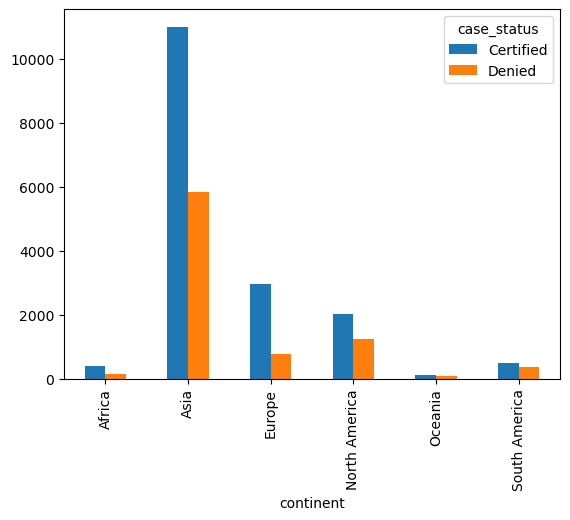

In [37]:
df4.plot(kind='bar')

In [ ]:
**** Multi variate analysis *****
- Education
- continent
- case status

We already know from Asia there 11K Accepted Visa
    - In that I want further down based on education
    - Here also pd.crosstab
        - First fix any one of the column as index in out of three columns.
        - Then keep two columns combined in a list and pass as data column
        

In [40]:
index_column = visa_df['continent']
data_column = [visa_df['education_of_employee'], 
               visa_df['case_status']]
df5 = pd.crosstab(visa_df['continent'], data_column)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

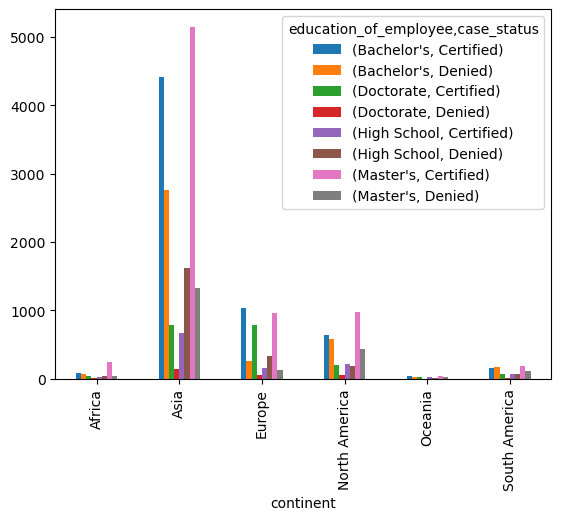

In [41]:
df5.plot(kind='bar')

In [ ]:
******************Numerical vs Numerical ***********

 ---- To understand Numerical columns relation we need to plot scatter plots
 --- Scatter plots gives the relation between two numerical columns
 --- Bar chart - Pie chart - histogram - scatter plots
 --- scatters plot under matplotlib package

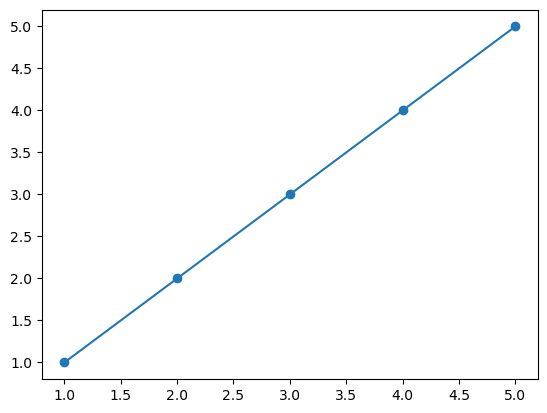

In [50]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

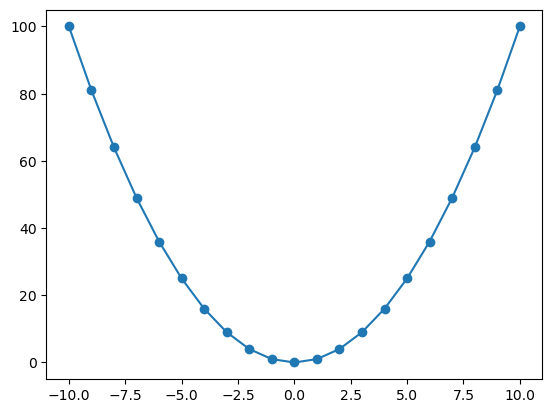

In [55]:
x=[i for i in range(-10,11)]
y=[i*i for i in range(-10,11)]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()


In [ ]:
Step-1 : Read one numerical column
Step-2 : Read another numerical column
Step-3: Apply the scatter plot

In [53]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [56]:
pd.DataFrame(zip(x,y))

,0,1
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


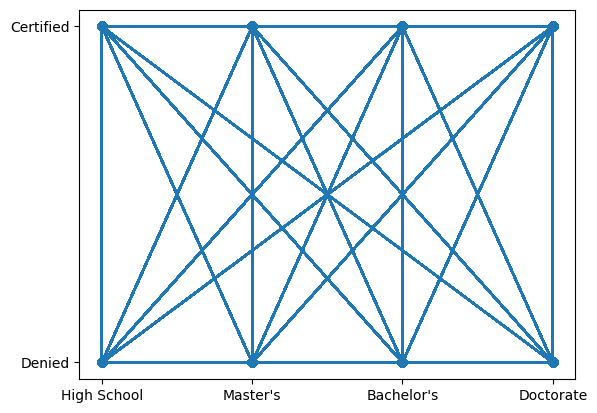

In [58]:
data_column = [visa_df['education_of_employee'], 
               visa_df['case_status']]
x=visa_df['education_of_employee']
y=visa_df['case_status']
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

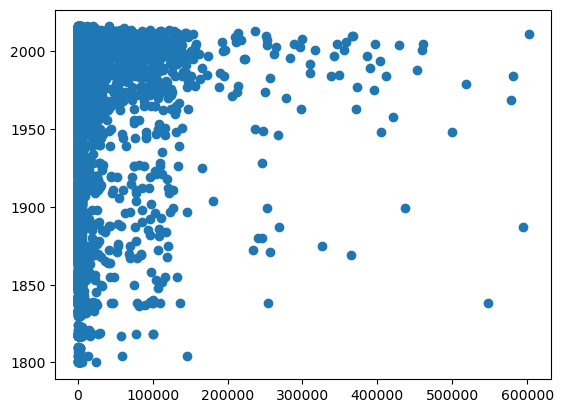

In [60]:
column1=visa_df['no_of_employees']
column2=visa_df['yr_of_estab']
column3=visa_df['prevailing_wage']
plt.scatter(column1,column2)


In [ ]:
Mean deviation
Absolute mean deviation
Variance
Covariance
Corelation coeffiecient

Text(0, 0.5, 'prevailing_wage')

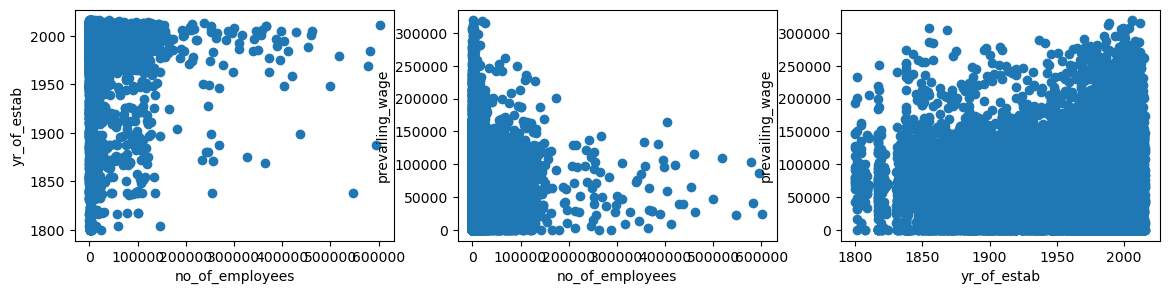

In [62]:
column1=visa_df['no_of_employees']
column2=visa_df['yr_of_estab']
column3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
####################################
plt.subplot(1,3,1).scatter(column1,column2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
####################################
plt.subplot(1,3,2).scatter(column1,column3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
####################################
plt.subplot(1,3,3).scatter(column2,column3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')


In [ ]:
**********Covarince versus Correlation*****************
Screenshots taken, require to add the concept here
*****Method name : corr

In [63]:
visa_df.corr(numeric_only=True)


,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
*************Heat map***************
 - Heat map is one of the important visualization method, to show the matrix form of the values
 - It is under seaborn package
 - In every matrix, we have highest values and lowest values available
 - HEat map will give color visualization
 - Also, it provides color bar, which color indicates which value
 - 

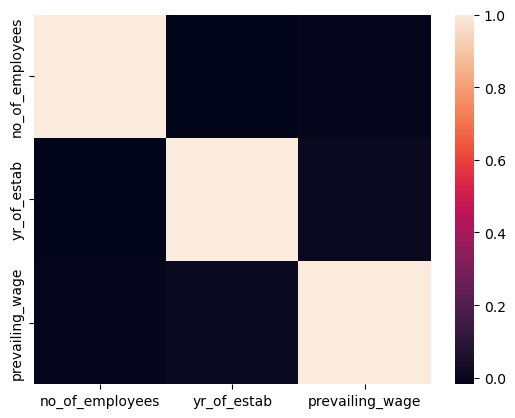

In [65]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)
plt.show()

In [ ]:
- By seeing the Graphs we might not say the relation status

- It is best practice get the percentage of relation using correlation

- All 3 columns having approximately zero percentage of relation
 
- No relation means independent each other

- In ML, we expect the input columns should be independent each other

- We have 3 columns 3*3 total 9 fields

- If a data has 20 columns, then 20*20 total 400 fields

- Thats why always go with heat map visualization

In [ ]:
How to convert categorical columns 